# Social Media Analysis

**Latar Belakang :** <br>
Data yang digunakan merupakan data twitter yang terdiri dari dua variabel. Variabel 'text' dan variabel 'target'. Variabel 'text' merupakan data yang berisi 1.600.000 tweet. Sedangkan untuk variabel 'target' merupakan variabel kategorik yang berisi code sentimen. 
<br>
<br>
**Tujuan :** <br>
Berdasarkan kedua variabel yang telah tersedia, maka analsis yang akan dilakukan yaitu ingin melakukan klasifikasi data tweet (text) berdasarkan sentimennya. Untuk menemukan model terbaik, maka dalam melakukan analsis akan membandingkan beberapa metode klasifikasi yang dapat digunakan.

In [5]:
# Install Package to Load Data
import pandas as pd
import numpy as np

In [6]:
# Import Data
df = pd.read_csv('clean_tweet.csv')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [7]:
df.shape

(1600000, 2)

> Berdasarkan fungsi di atas, maka dapat diketahui data yang akan dianalsis terdiri dari 1.600.000 observasi yang terdiri dari dua variabel. Dua variabel tersebut adalah variabel 'text' dan 'target'

In [8]:
df['target'].value_counts()

1    800000
0    800000
Name: target, dtype: int64

> Berdasarkan fungsi di atas, maka dapat diketahui untuk data yang memiliki sentimen negatif (code = 0) dan sentimen positif (code = 1) memiliki proporsi yang sama besar (50:50).Untuk code = 0 merupakan sentimen negatif dan untuk code = 1 merupakan sentimen positif.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1600000 non-null int64
dtypes: int64(1), object(1)
memory usage: 24.4+ MB


> Berdasarkan data info maka dapat diketahui terdapat data *missing value*, sehingga perlu dilakukan penghapusan data *missing* terlebih dahulu agar dapat melakukan analsiis lebih lanjut. 

In [10]:
df = df.dropna()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1596753 entries, 0 to 1599999
Data columns (total 2 columns):
text      1596753 non-null object
target    1596753 non-null int64
dtypes: int64(1), object(1)
memory usage: 36.5+ MB


> Berdasarkan hasil maka dapat diketahui : yang pada awalnya terdapat 800.000 observasi untuk setiap sentimen, setelah melakukan penghapusan *missing value* observasi untuk setiap kategori sentimennya menjadi 1.596.753. 

In [12]:
import pandas as pd 
import numpy as np
import tweepy as tp

# Import nltk module 
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

# Import Reguler Expression 
import re

# Import textblob 
from textblob import TextBlob

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 

# Lemazitation
from textblob import Word

# WordCloud
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\afifah064126\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data Prepocessing

1. Delete Duplicate Data
2. Lower Casing
3. Punctuation Removal
4. Stopwords removal
5. Frequent words removal
6. Rare words removal
7. Spelling Correction
8. Tokenization
9. Stemming
10. Lematization

In [13]:
# 1. Delete Duplicate Tweet
df = df.drop_duplicates()
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [14]:
# 2. Lower Casing
df['text'] = df['text'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [15]:
# 3. Punctuation Removal
df['text'] = df['text'].str.replace('[^\w\s]','')
df.head()

,text,target
0,awww that s a bummer you shoulda got david car...,0
1,is upset that he can t update his facebook by ...,0
2,i dived many times for the ball managed to sav...,0
3,my whole body feels itchy and like its on fire,0
4,no it s not behaving at all i m mad why am i h...,0


In [16]:
# 4. Stopwords Removal
stop = stopwords.words('english')
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head()

,text,target
0,awww bummer shoulda got david carr third day,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest go bounds,0
3,whole body feels itchy like fire,0
4,behaving mad see,0


In [17]:
# 5. Frequent words removal
freq = pd.Series(' '.join(df['text']).split()).value_counts()[:10]
freq

good     86416
day      85998
get      80243
like     77569
go       72813
today    67343
going    63679
love     63269
work     62521
got      60636
dtype: int64

In [18]:
# 6. Rare words removal
rare_word = pd.Series(' '.join(df['text']).split()).value_counts()[-10:]
rare_word

fiqah        1
kneessss     1
adicting     1
exmpp        1
workking     1
deeeemi      1
assiments    1
cacar        1
cortege      1
aleew        1
dtype: int64

In [19]:
rare_word = list(rare_word.index)
df['text'] = df['text'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
df.head()

,text,target
0,awww bummer shoulda david carr third,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest bounds,0
3,whole body feels itchy fire,0
4,behaving mad see,0


In [20]:
# 7. Spelling Correction
df['text'][:5].apply(lambda x: str(TextBlob(x).correct()))
df.head()

,text,target
0,awww bummer shoulda david carr third,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest bounds,0
3,whole body feels itchy fire,0
4,behaving mad see,0


In [21]:
# 8. Tokenization
TextBlob(df['text'][1]).words
df.head()

,text,target
0,awww bummer shoulda david carr third,0
1,upset update facebook texting might cry result...,0
2,dived many times ball managed save rest bounds,0
3,whole body feels itchy fire,0
4,behaving mad see,0


In [22]:
# 9 Stemming
st = PorterStemmer()
df['text'] = df['text'][:].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))
df.head()

,text,target
0,awww bummer shoulda david carr third,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save rest bound,0
3,whole bodi feel itchi fire,0
4,behav mad see,0


In [23]:
# 10. Lematization
from textblob import Word
df['text'] = df['text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
df.head()

,text,target
0,awww bummer shoulda david carr third,0
1,upset updat facebook text might cri result sch...,0
2,dive mani time ball manag save rest bound,0
3,whole bodi feel itchi fire,0
4,behav mad see,0


> Setelah melakukan Pre-Processing Data, maka harapannya analisis yang dihasilkan akan lebih baik. Penjelasan untuk setiap tahap preprocessing dapat dilihat pada [link](https://github.com/afifahnrswr/Social-Media-Analysis/blob/master/code/19.09.20_Practice_1_Twitter%20Airline%20Sentiment.ipynb) berikut.

## Word Cloud
Word cloud (disebut juga text cloud atau tag cloud) merupakan salah satu metode untuk menampilkan data teks secara visual. Dengan menggunakan word cloud, gambaran frekuensi kata-kata dapat ditampilkan dalam bentuk yang menarik namun tetap informatif. Semakin sering satu kata digunakan, maka semakin besar pula ukuran kata tersebut ditampilkan dalam word cloud.
<br>

In [24]:
df1 = df
wordc = "".join(df1.text.values)

In [25]:
def create_word_cloud(string):
    cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(string)
    plt.imshow(cloud, interpolation='bilinear')
    plt.figure(1,figsize=(21, 10))
    plt.axis('off')
    plt.show()

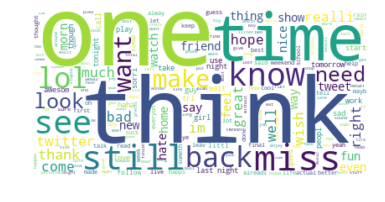

In [26]:
create_word_cloud(wordc)

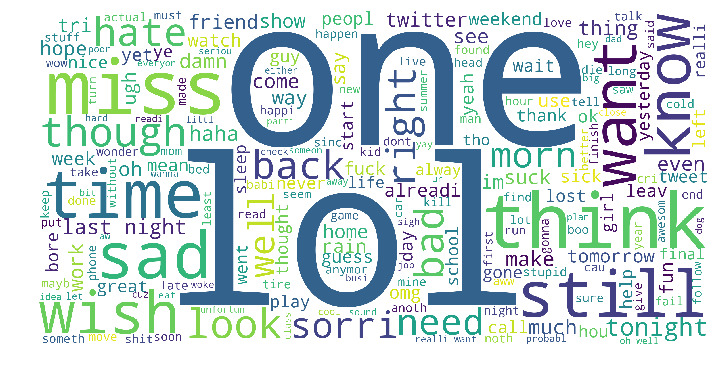

In [56]:
negative=df[df['target']== 0]
words = ' '.join(negative['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=1500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [61]:
for t in negative.text[:200]:
    if 'lol' in t:
        print(t)

hey long time see ye rain bit bit lol fine thank
ooooh lol lesli ok lesli mad
lol wish understood daylight save end though breakfast hour later keep wake kid
seriou lol


> Berdasarkan syntax di atas, maka dapat diketahui bahwa kata "lol" yang sering tertulis dalam kalimat dan masuk ke dalam sentimen negatif

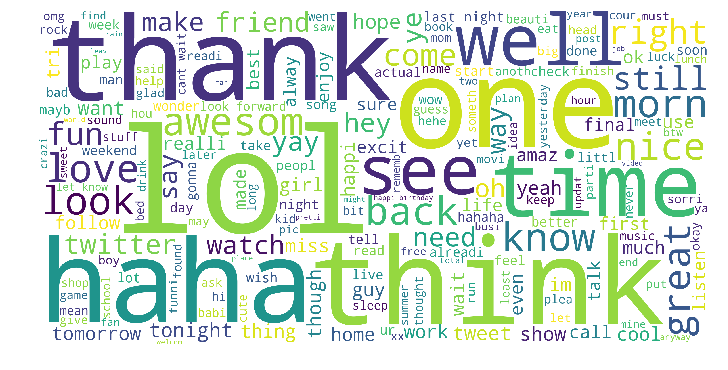

In [59]:
positive=df[df['target']== 1]
words = ' '.join(positive['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='white',
                      width=3000,
                      height=1500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [62]:
for t in positive.text[:200]:
    if 'lol' in t:
        print(t)

make sure dm post link video lol miss better permiss bless first
yayyy lol request herrr say
seriou sing whoa hehe lsd mayb j k lolol
brother sick lol quit weird
first one tell tweet drink lol
lol fuck funni
im get nervou trip tomorrow may littl bore haha oh well alway trusti ipod book cour lol


> Berdasarkan syntax di atas, maka dapat diketahui bahwa kata "lol" yang sering tertulis dalam kalimat dan masuk ke dalam sentimen positif.

### Feature Extraction
1. Count Vectorizer : digunakan untuk menghitung frekuensi term data
2. TF-IDF (Term Frequency-Inverse Document Frequency) Vectorization : memberikan bobot antar kata dari keselurahan data.
<br>

TF : mengukur seberapa sering suatu istilah muncul dalam dokumen. <br>
> ${TF(t,d)} = \frac{number of times term(t) appears in document(d)}{total number of terms in document(d)}$
<br>

IDF : mengukur seberapa penting sebuah term. <br>

> ${IDF(t)} = \frac{Total number of documents}{Number of documents with term t in it}$

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [33]:
# Count Vectorizer
count_vectorizer = CountVectorizer(stop_words='english')

In [34]:
# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english' )

## Modeling
Berdasarkan data, maka pemodelan yang dapat digunakan yaitu dengan menggunakan metode klasifikasi. Beberapa metode klasifikasi yang digunakan dalam analisis diantaranya adalah :
1. Regresi Logistik
2. Naive Bayes

Kedua metode tersebut digunakan karena ingin membandingkan metode statistika (regresi Logistik) dan juga metode machine learning (Naive Bayes). Pada dasarnya masih banyak metode metode lainnya yang dapat dilakukan, hanya saja dikarenakan banyak nya data, maka diperlukan waktu lebih dalam melakukan analsis. 

In [35]:
# Import sklearn for model evaluation 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, precision_score, roc_auc_score
from sklearn.metrics import auc, roc_curve

In [36]:
X = df['text']
y = df['target']

In [37]:
# Count Vectorizer
X_vectorizer = count_vectorizer.fit_transform(X)

In [ ]:
# TF-IDF vectorizer
X_tfidf = tfidf.fit_transform(X)

In [38]:
from sklearn.model_selection import train_test_split
#train test split using countvectorizer 
train_X_vectorizer, test_X_vectorizer, train_y, test_y = train_test_split(X_vectorizer, y, test_size=0.2, random_state=0)

#train test split using tfidfvectorizer 
train_X_tfidf, test_X_tfidf, train_y, test_y = train_test_split(X_tfidf, y, test_size=0.2, random_state=0)

In [53]:
train_y.shape

(1222512,)

In [54]:
test_y.shape

(305628,)

> Berdasarkan split data traning dan testing yang telah dilakukan maka dapat diketahui data train sebesar 1.222.512 dan selebihnya menjadi data testing pemodelan.

### 1. Regresi Logistik

In [39]:
from sklearn.linear_model import LogisticRegression
# Countvectorizer 
Lr_vect = LogisticRegression()
Lr_vect.fit(train_X_vectorizer,train_y)
Lr_pred_vect_train = Lr_vect.predict(train_X_vectorizer)
Lr_pred_vect_test = Lr_vect.predict(test_X_vectorizer)
Lr_pred_vect_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [40]:
# TFIDFVectorizer
Lr_tfidf = LogisticRegression()
Lr_tfidf.fit(train_X_tfidf,train_y)
Lr_pred_tfidf_train = Lr_tfidf.predict(train_X_tfidf)
Lr_pred_tfidf_test = Lr_tfidf.predict(test_X_tfidf)

In [49]:
# Melakukan pemodelan menggunakan Regresi Logistik menggunakan count vectorizer
print("______________ Countvectorizer ______________")

Lr_recall_vec_train = recall_score(train_y, Lr_pred_vect_train, average="micro")
Lr_recall_vec_test = recall_score(test_y, Lr_pred_vect_test,average="micro") 

Lr_precision_vec_train = precision_score(train_y, Lr_pred_vect_train,average="micro")
Lr_precision_vec_test = precision_score(test_y, Lr_pred_vect_test,average="micro")

Lr_f1_score_vec_train = f1_score(train_y, Lr_pred_vect_train,average="micro")
Lr_f1_score_vec_test = f1_score(test_y,Lr_pred_vect_test,average="micro")

Lr_AUC = roc_auc_score(test_y,Lr_pred_vect_test)

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_vec_train * 100), '&', '%.2f%%' % (Lr_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_vec_train * 100), '&', '%.2f%%' % (Lr_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_vec_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))
print('AUC Score               : %.2f%%' % (Lr_AUC * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 78.94% & 75.92%
Precision train & test  : 78.94% & 75.92%
F1 Score train & test   : 78.94% & 75.92%
AUC Score               : 75.94%


In [72]:
fpr1, tpr1, thresholds1 = roc_curve(test_y, Lr_pred_vect_test)
auc1 = auc(fpr1, tpr1)

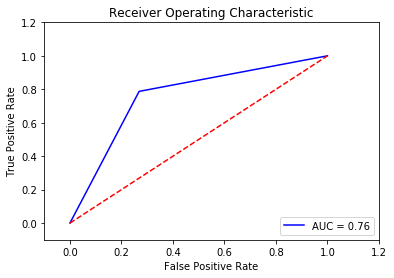

In [74]:
plt.figure()
plt.title('Receiver Operating Characteristic')
plt.plot(fpr1, tpr1, 'b',
label='AUC = %0.2f'% auc1)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.1,1.2])
plt.ylim([-0.1,1.2])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [44]:
# Melakukan pemodelan menggunakan Regresi Logistik menggunakan TF-IDF
print("______________ TF-IDF ______________")


Lr_recall_tfidf_train = recall_score(train_y, Lr_pred_tfidf_train, average="micro")
Lr_recall_tfidf_test = recall_score(test_y, Lr_pred_tfidf_test,average="micro") 

Lr_precision_tfidf_train = precision_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_precision_tfidf_test = precision_score(test_y, Lr_pred_tfidf_test,average="micro")

Lr_f1_score_tfidf_train = f1_score(train_y, Lr_pred_tfidf_train,average="micro")
Lr_f1_score_tfidf_test = f1_score(test_y,Lr_pred_tfidf_test,average="micro")

Lr_AUC_tfidf = roc_auc_score(test_y,Lr_pred_tfidf_test)

print('Information :')
print('Recall train & test     : %.2f%%' % (Lr_recall_tfidf_train * 100), '&', '%.2f%%' % (Lr_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (Lr_precision_tfidf_train * 100), '&', '%.2f%%' % (Lr_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (Lr_f1_score_tfidf_train * 100), '&', '%.2f%%' % (Lr_f1_score_vec_test * 100))
print('AUC Score               : %.2f%%' % (Lr_AUC_tfidf * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 78.23% & 76.08%
Precision train & test  : 78.23% & 76.08%
F1 Score train & test   : 78.23% & 75.92%
AUC Score               : 76.09%


### 2. Naive Bayes

In [45]:
from sklearn.naive_bayes import MultinomialNB
# Countvectorizer
NB_vect = MultinomialNB()
NB_vect.fit(train_X_vectorizer,train_y)
NB_pred_vect_train = NB_vect.predict(train_X_vectorizer)
NB_pred_vect_test = NB_vect.predict(test_X_vectorizer)
NB_pred_vect_test

array([1, 0, 0, ..., 1, 1, 1], dtype=int64)

In [46]:
# TFIDFVectorizer
#from sklearn.naive_bayes import GaussianNB
NB_tfidf = MultinomialNB()
NB_tfidf.fit(train_X_tfidf,train_y)
NB_pred_tfidf_train = NB_tfidf.predict(train_X_tfidf)
NB_pred_tfidf_test = NB_tfidf.predict(test_X_tfidf)
NB_pred_tfidf_test

array([1, 0, 0, ..., 1, 1, 0], dtype=int64)

In [50]:
# Melakukan pemodelan menggunakan Naive Bayes menggunakan count vectorizer
print("______________ Countvectorizer ______________")


NB_recall_vec_train = recall_score(train_y, NB_pred_vect_train, average="micro")
NB_recall_vec_test = recall_score(test_y, NB_pred_vect_test,average="micro") 

NB_precision_vec_train = precision_score(train_y, NB_pred_vect_train,average="micro")
NB_precision_vec_test = precision_score(test_y, NB_pred_vect_test,average="micro")

NB_f1_score_vec_train = f1_score(train_y, NB_pred_vect_train,average="micro")
NB_f1_score_vec_test = f1_score(test_y,NB_pred_vect_test,average="micro")

NB_AUC = roc_auc_score(test_y,NB_pred_vect_test)

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_vec_train * 100), '&', '%.2f%%' % (NB_recall_vec_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_vec_train * 100), '&', '%.2f%%' % (NB_precision_vec_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_vec_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))
print('AUC Score               : %.2f%%' % (NB_AUC * 100))

______________ Countvectorizer ______________
Information :
Recall train & test     : 77.76% & 75.11%
Precision train & test  : 77.76% & 75.11%
F1 Score train & test   : 77.76% & 75.11%
AUC Score               : 75.11%


In [51]:
# Melakukan pemodelan menggunakan Naive Bayes menggunakan TF-IDF
print("______________ TF-IDF ______________")


NB_recall_tfidf_train = recall_score(train_y, NB_pred_tfidf_train, average="micro")
NB_recall_tfidf_test = recall_score(test_y, NB_pred_tfidf_test,average="micro") 

NB_precision_tfidf_train = precision_score(train_y, NB_pred_tfidf_train,average="micro")
NB_precision_tfidf_test = precision_score(test_y, NB_pred_tfidf_test,average="micro")

NB_f1_score_tfidf_train = f1_score(train_y, NB_pred_tfidf_train,average="micro")
NB_f1_score_tfidf_test = f1_score(test_y,NB_pred_tfidf_test,average="micro")

NB_AUC_tfidf = roc_auc_score(test_y,NB_pred_tfidf_test)

print('Information :')
print('Recall train & test     : %.2f%%' % (NB_recall_tfidf_train * 100), '&', '%.2f%%' % (NB_recall_tfidf_test * 100))
print('Precision train & test  : %.2f%%' % (NB_precision_tfidf_train * 100), '&', '%.2f%%' % (NB_precision_tfidf_test * 100))
print('F1 Score train & test   : %.2f%%' % (NB_f1_score_tfidf_train * 100), '&', '%.2f%%' % (NB_f1_score_vec_test * 100))
print('AUC Score               : %.2f%%' % (NB_AUC_tfidf * 100))

______________ TF-IDF ______________
Information :
Recall train & test     : 77.71% & 74.35%
Precision train & test  : 77.71% & 74.35%
F1 Score train & test   : 77.71% & 75.11%
AUC Score               : 74.34%


In [67]:
data = [[Lr_AUC, Lr_AUC_tfidf], [NB_AUC, NB_AUC_tfidf]]
data = pd.DataFrame(data, columns = ['Reg Logistik', 'Naive Bayes'], index =['Countvectorizer', 'TF-IDF']) 
data

,Reg Logistik,Naive Bayes
Countvectorizer,0.759371,0.760908
TF-IDF,0.751060,0.743433


> Berdasarkan pemodelan yang telah dilakukan, maka dapat diketahui berdasarkan nilai Recall/Sensitifitas, Presisi dan F1 Score yang telah diperoleh pada kedua pemodelan di atas menunjukkan metode **Naive Bayes** dengan menggunakan Feature Extraction **Countvectorizer** merupakan metode terbaik dalam melakukan kasifikasi dalam kasus ini. Hal ini dapat dilihat beerdasarkan nilai AUC pada tabel di atas. Nilai AUC lebih diunggulkan dalam menentukan metode terbaik dikarenakan dengan menggunakan AUC mempertimbangkan keseluruhan nilai yang ada.